In [1]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import torch

from PIL import Image

In [2]:
from model import Generator

In [3]:
# Setting manual seed for reproducibility
manual_seed = 999
random.seed(manual_seed)
print(f"Random Seed: {manual_seed}")
torch.manual_seed(manual_seed)

Random Seed: 999


In [4]:
%matplotlib inline

print(os.listdir("../data/Brain Tumor Data Set - Copy/Brain Tumor Data Set/"))

['Brain Tumor', 'Healthy', 'normal', 'tumor']


In [5]:
datadir = "../data/Brain Tumor Data Set - Copy/Brain Tumor Data Set/"

traindir = f"{datadir}train/"
# testdir = f"{datadir}test/"
# validdir = f"{datadir}val/"

In [6]:
BATCH_SIZE = 128
NUM_GPU = torch.cuda.device_count() if torch.cuda.is_available() else 0

device = torch.device("cuda:0" if NUM_GPU else "cpu")
print(f"Using device: {device}")

Using device: cuda:0


In [7]:
noise_dimension = 100
image_shape = (1, 128, 128)
num_classes = 2
embedding_dim = BATCH_SIZE
features_g = 32
ngpu = 2

x.shape=torch.Size([1, 100, 1, 1])
y.shape=torch.Size([1]), tensor([0])
y=tensor([0])
generator(x, y).shape=torch.Size([1, 1, 128, 128])
torch.Size([128, 128, 1])


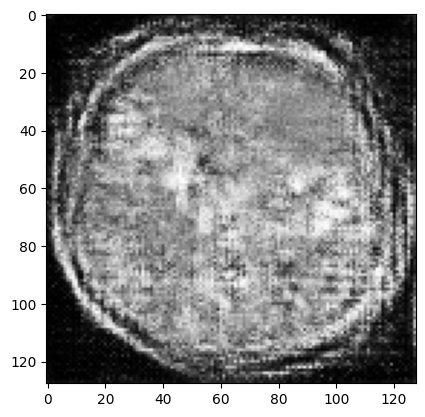

In [8]:
generator = Generator(
    noise_dimension, image_shape, num_classes, embedding_dim, features_g, ngpu
)
generator.load_state_dict(torch.load('tumor_generator.pt'))
generator.eval()
# print(generator)

x = torch.randn(1, noise_dimension, 1, 1)
y = torch.randint(0, num_classes, (1,))

print(f"{x.shape=}")
print(f"{y.shape=}, {y}")
print(f"{y=}")

assert generator(x, y).shape == (1, 1, 128, 128)
print(f"{generator(x, y).shape=}")

with torch.no_grad():
    result = generator(x, y)
    result = result[0].permute(1, 2, 0) * 0.5 + 0.5
    print(f"{result.shape}")
    # for item in result[0]:
    plt.imshow(result, cmap='gray')
    plt.show()

y.shape=torch.Size([2]), tensor([0, 0])
result.shape=torch.Size([2, 1, 128, 128])
torch.Size([128, 128, 1])


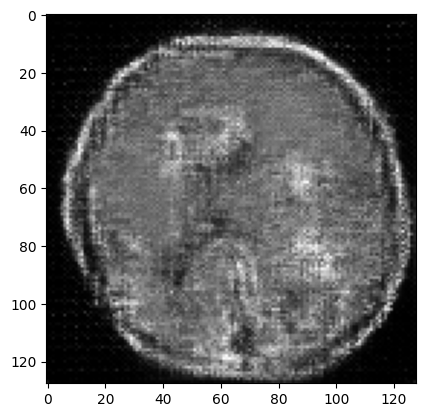

torch.Size([128, 128, 1])


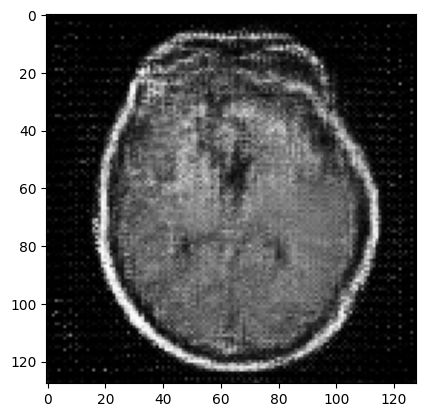

In [9]:
x = torch.randn(2, noise_dimension, 1, 1)
y = torch.zeros(2, dtype=torch.int64)

print(f"{y.shape=}, {y}")

with torch.no_grad():
    result = generator(x, y)
    print(f"{result.shape=}")
    for item in result:
        img =item.permute(1, 2, 0) * 0.5 + 0.5
        print(f"{img.shape}")
        # for item in result[0]:
        plt.imshow(img, cmap='gray')
        plt.show()

## Normal Image Save

In [10]:
num_img = 128
x = torch.randn(num_img, noise_dimension, 1, 1)
y = torch.zeros(num_img, dtype=torch.int64)

print(f"{y.shape=}")

with torch.no_grad():
    result = generator(x, y)
    print(f"{result.shape=}")
    for idx, item in enumerate(result):
        img = (item.permute(1, 2, 0) * 0.5 + 0.5)
        img = torch.squeeze(img)
        # print(f"{img.shape}")
        # plt.imshow(img, cmap='gray')
        # plt.show()
        
        img = Image.fromarray(np.uint8(img.numpy() * 255), 'L')
        img.save(f"{datadir}tumor/{idx}.png")
        print(f"Image saved - {idx}.png")
        

y.shape=torch.Size([128])
result.shape=torch.Size([128, 1, 128, 128])
Image saved - 0.png
Image saved - 1.png
Image saved - 2.png
Image saved - 3.png
Image saved - 4.png
Image saved - 5.png
Image saved - 6.png
Image saved - 7.png
Image saved - 8.png
Image saved - 9.png
Image saved - 10.png
Image saved - 11.png
Image saved - 12.png
Image saved - 13.png
Image saved - 14.png
Image saved - 15.png
Image saved - 16.png
Image saved - 17.png
Image saved - 18.png
Image saved - 19.png
Image saved - 20.png
Image saved - 21.png
Image saved - 22.png
Image saved - 23.png
Image saved - 24.png
Image saved - 25.png
Image saved - 26.png
Image saved - 27.png
Image saved - 28.png
Image saved - 29.png
Image saved - 30.png
Image saved - 31.png
Image saved - 32.png
Image saved - 33.png
Image saved - 34.png
Image saved - 35.png
Image saved - 36.png
Image saved - 37.png
Image saved - 38.png
Image saved - 39.png
Image saved - 40.png
Image saved - 41.png
Image saved - 42.png
Image saved - 43.png
Image saved - 44

## Tumor Image Save

In [13]:
num_img = 128
x = torch.randn(num_img, noise_dimension, 1, 1)
y = torch.ones(num_img, dtype=torch.int64)

print(f"{y.shape=}")

with torch.no_grad():
    result = generator(x, y)
    print(f"{result.shape=}")
    for idx, item in enumerate(result):
        img =item.permute(1, 2, 0) * 0.5 + 0.5
        img = torch.squeeze(img)
        # print(f"{img.shape}")
        # plt.imshow(img, cmap='gray')
        # plt.show()
        
        img = Image.fromarray(np.uint8(img.numpy() * 255), 'L')
        img.save(f"{datadir}normal/{idx}.png")
        print(f"Image saved - {idx}.png")
        

y.shape=torch.Size([128])
result.shape=torch.Size([128, 1, 128, 128])
Image saved - 0.png
Image saved - 1.png
Image saved - 2.png
Image saved - 3.png
Image saved - 4.png
Image saved - 5.png
Image saved - 6.png
Image saved - 7.png
Image saved - 8.png
Image saved - 9.png
Image saved - 10.png
Image saved - 11.png
Image saved - 12.png
Image saved - 13.png
Image saved - 14.png
Image saved - 15.png
Image saved - 16.png
Image saved - 17.png
Image saved - 18.png
Image saved - 19.png
Image saved - 20.png
Image saved - 21.png
Image saved - 22.png
Image saved - 23.png
Image saved - 24.png
Image saved - 25.png
Image saved - 26.png
Image saved - 27.png
Image saved - 28.png
Image saved - 29.png
Image saved - 30.png
Image saved - 31.png
Image saved - 32.png
Image saved - 33.png
Image saved - 34.png
Image saved - 35.png
Image saved - 36.png
Image saved - 37.png
Image saved - 38.png
Image saved - 39.png
Image saved - 40.png
Image saved - 41.png
Image saved - 42.png
Image saved - 43.png
Image saved - 44